In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.algorithms import community,k_components
import random

In [15]:
Types = {'electrique': 1000, 'thermique':2424}

Types_vitesseslimit = {'electrique': 200, 'thermique':150}

Types_perc = {'electrique': 0.5, 'thermique':0.5}

In [7]:
def matrice_ville(i,j):
    return [[0 for x in range(i)] for y in range(j)] 

In [31]:
ville_1m = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1] ,
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]] 

In [32]:
ville_1m


[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]]

In [62]:
def ville_graphe(ville_m,i,lenmin,lenmax):
    ville_graph = nx.Graph()
    ville_graph.add_nodes_from(range(i))
    ville_graph.add_edges_from([(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1])
    for k in range(i-1):
        L= [(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1]
        for a,b in L : 
             ville_graph.add_edge(a,b, len = random.randint(lenmin,lenmax))
    pos = nx.spring_layout(ville_graph)
    nx.draw_networkx_edges(ville_graph,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(ville_graph, pos)
    nx.draw(ville_graph, pos, with_labels=True)
    return ville_graph


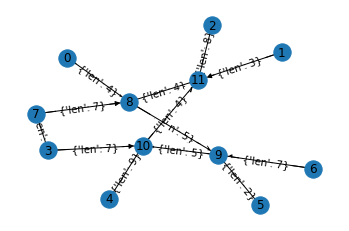

In [66]:
ville_1g = ville_graphe(ville_1m,12,2,10)

In [77]:
class Voiture:
    nbr_voiture = 0
    def __init__(self,typee,positiondepart,positionarrivé,positionactuelle,vitesse,vitesse_max):
        self.type = typee
        self.speed = vitesse 
        """position est un tuple d'un tuple de position et d'un pourcentage """
        self.position = positionactuelle
        self.positiondepart = positiondepart
        self.positionarrivé = positionarrivé
        self.vitesse_max =vitesse_max
        "chemin le plus cours a"
        self.chemin = nx.shortest_path(ville_1g, source=positiondepart, target=positionarrivé, weight='len', method='dijkstra')
        Voiture.nbr_voiture += 1
    def spawn(typesperc,nbr):
        system=[]
        for i in range(round(nbr*typesperc['electrique'])):
            system.append("voiture"+str(i+1))
            system[i]= Voiture('electrique',0,0,((0,0),0.0),50,Types_vitesseslimit['electrique'])
        for j in range(round(nbr*typesperc['thermique']), nbr):
            system.append("voiture"+str(j+1))
            system[j]= Voiture('thermique',0,0,((0,0),0.0),50,Types_vitesseslimit['thermique'])
        return system


In [71]:


v1 = Voiture("thermique",0,0,0,0,130)
print("le type de voiture de v1 est {}".format(v1.type))
v2 = Voiture("Electrique",0,0,0,0,150)
print("v2 est de type {}".format(v2.type))
v=Voiture.spawn(Types_perc,6,)
for i in range(6):
    print(format(v[i].type),format(v[i].vitesse_max),format(v[i].speed),format(v[i].position),format(v[i].positiondepart),format(v[i].positionarrivé))

le type de voiture de v1 est thermique
v2 est de type Electrique
electrique 200 50 ((0, 0), 0.0) 0 0
electrique 200 50 ((0, 0), 0.0) 0 0
electrique 200 50 ((0, 0), 0.0) 0 0
thermique 150 50 ((0, 0), 0.0) 0 0
thermique 150 50 ((0, 0), 0.0) 0 0
thermique 150 50 ((0, 0), 0.0) 0 0


In [58]:
nx.shortest_path(ville_1g, source=5, target=1, weight='len', method='dijkstra')

[5, 9, 10, 11, 1]

In [61]:
5/36

0.1388888888888889

In [67]:
length = nx.get_edge_attributes(ville_1g,'len')
length

{(0, 8): 4,
 (1, 11): 3,
 (2, 11): 8,
 (3, 7): 4,
 (3, 10): 7,
 (4, 10): 9,
 (5, 9): 2,
 (6, 9): 7,
 (7, 8): 7,
 (8, 9): 5,
 (8, 11): 4,
 (9, 10): 5,
 (10, 11): 4}

In [56]:
nn = nx.all_shortest_paths(ville_1g, source=5, target=1, weight=None, method='dijkstra')
l=[]
for i in nn:
    l.append(i)
l

[[5, 9, 8, 11, 1], [5, 9, 10, 11, 1]]

In [57]:
nx.shortest_path_length(ville_1g, source=5, target=1, weight='len', method='dijkstra')

15

In [ ]:
def calcule_distance(voiture):
    "calcule la distance qu'une voiture a parcouru dans la node (route)"
    posact=voiture.position[0]
    longueur=nx.get_edge_attributes(ville_1g,'len')
    
    
    

In [98]:
def change_distance(voiture):
    """Fonction qui a pour but de faire évoluer la vitesse d'une voiture 
    toute le 10 sec """
    chemin = voiture.chemin
    distance_parcouru =(voiture.speed*10)/3600
    
    if voiture.position[1]+(distance_parcouru*100)/length[voiture.position[0]] > 100:
        voiture.position = (voiture.position[0],0)
        
    
    if voiture.position[1]<100:
        voiture.position = (voiture.position[0],voiture.position[1]+(distance_parcouru*100)/length[voiture.position[0]])
    
    

In [99]:
popu = Voiture.spawn(Types_perc,6)
popu[0].position=((8,11),90)
print(popu[0].speed)
for i in range(5):
    change_distance(popu[0])
    print(popu[0].position[1])
    

50
93.47222222222223
96.94444444444446
3.4722222222222223
6.944444444444445
10.416666666666668
